# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data_complete = pd.merge(mouse_metadata,study_results, how = "left")

# Display the data table for preview
mice_data_complete.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [113]:
mice_data_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [114]:
# Checking the number of mice.
mice_count=  mice_data_complete["Mouse ID"].nunique()
mice_count

249

In [115]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
double_mice_ID = mice_data_complete.loc[mice_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
double_mice_ID

array(['g989'], dtype=object)

In [116]:
 
duplicate_mice=mice_data_complete.loc[mice_data_complete["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [117]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_df = mice_data_complete[mice_data_complete['Mouse ID'].isin(double_mice_ID)==False]
clean_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [118]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_df = mice_data_complete[mice_data_complete['Mouse ID'].isin(duplicate_mice)==False]
mice_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [119]:
# Checking the number of mice in the clean DataFrame.
clean_count= clean_df["Mouse ID"].nunique()
clean_count

248

## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [122]:
mice_on_drugs = clean_df["Drug Regimen"].value_counts()
mice_on_drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Mice per Treatment')

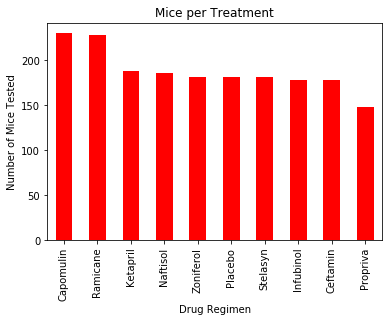

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tratment=mice_on_drugs.plot.bar(color='r')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice per Treatment")


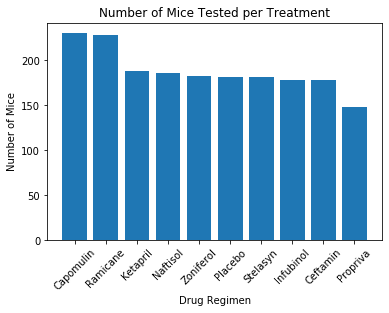

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_on_drugs.index.values
y_axis = mice_on_drugs.values

plt.bar(x_axis, y_axis)
#label pyplot
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation= 45)
plt.show()


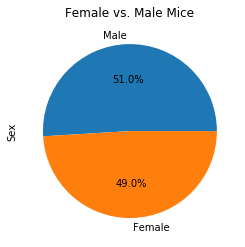

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_vs_female = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
male_vs_female.plot.pie(autopct= "%1.1f%%")
plt.show()

In [126]:
male_vs_female

Male      958
Female    922
Name: Sex, dtype: int64

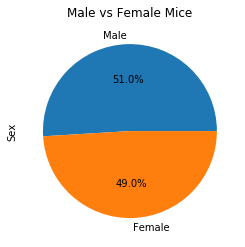

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = male_vs_female.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [129]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [130]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

    

In [131]:
drugs = mice_data_complete[mice_data_complete["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [132]:
# Create empty list to fill with tumor vol data (for plotting)
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [133]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"---------")
    treatment+=1

The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
---------
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
---------
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.
---------


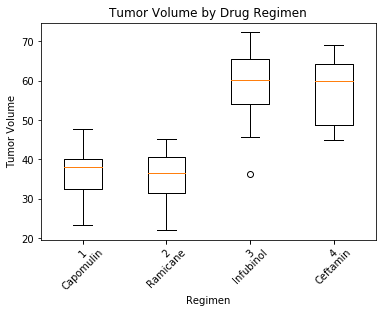

In [134]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_boxplot = []
for drug in drug_list:
      drug_boxplot.append(list(last_timepoint[drug].dropna()))

fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(drug_boxplot)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

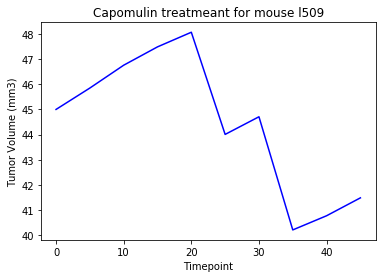

In [135]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

single_tumor_vs_time_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
single_tumor_vs_time_df.head()
x_axis = single_tumor_vs_time_df["Timepoint"]
tumor_size = single_tumor_vs_time_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant for mouse l509')
plt.plot(x_axis, tumor_size, markersize=15,color="blue")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

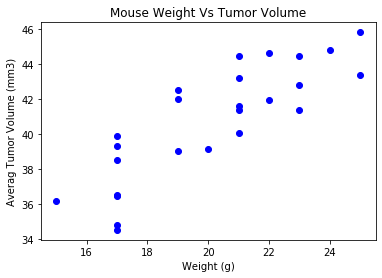

In [136]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

volume_capmulin_weight= plt.subplots()
capmulin_volume =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(capmulin_volume['Weight (g)'],capmulin_volume['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [137]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(capmulin_volume['Weight (g)'],capmulin_volume['Tumor Volume (mm3)'])
print(f"mouse weight and average tumor volume correlation is {round(correlation[0],2)}")

mouse weight and average tumor volume correlation is 0.84


The r-squared is: 0.71


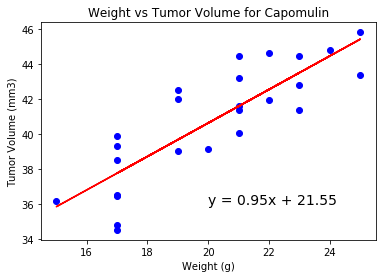

In [138]:
# linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(capmulin_volume["Weight (g)"],capmulin_volume["Tumor Volume (mm3)"])
regress_values=capmulin_volume["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(capmulin_volume["Weight (g)"],capmulin_volume["Tumor Volume (mm3)"],color='b')
plt.plot(capmulin_volume["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


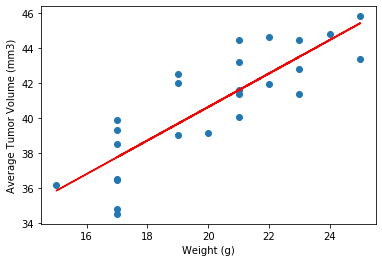

In [18]:
# linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
